In [2]:
from skimage.io import imread_collection
import numpy as np
import cv2

# Rutas de las carpetas de imágenes
folderJair = 'Data/Jair/*.jpg'
folderCris = 'Data/Cris/*.jpg'
folderOtro = 'Data/Messi/*.jpg'
folderDylan1 = 'Data/Dylan/*.jpg'
folderDesconocido = 'Data/FotosDes/*.jpg'

# Cargar imágenes
imagesJair = imread_collection(folderJair)
imagesCris = imread_collection(folderCris)
imagesOtro = imread_collection(folderOtro)
imagesDylan1 = imread_collection(folderDylan1)
imagesDesconocido = imread_collection(folderDesconocido)

nJair = len(imagesJair)
nCris = len(imagesCris)
nOtro = len(imagesOtro)
nDylan1 = len(imagesDylan1)
nDesconocido = len(imagesDesconocido)

# Dimensiones deseadas para el redimensionamiento
desired_width = 150
desired_height = 150

# Redimensionar imágenes a un tamaño consistente
resized_imagesJair = []
for image in imagesJair:
    resized_image = cv2.resize(image, (desired_width, desired_height))
    resized_imagesJair.append(resized_image)

resized_imagesCris = []
for image in imagesCris:
    resized_image = cv2.resize(image, (desired_width, desired_height))
    resized_imagesCris.append(resized_image)

resized_imagesOtro = []
for image in imagesOtro:
    resized_image = cv2.resize(image, (desired_width, desired_height))
    resized_imagesOtro.append(resized_image)

resized_imagesDylan1 = []
for image in imagesDylan1:
    resized_image = cv2.resize(image, (desired_width, desired_height))
    resized_imagesDylan1.append(resized_image)

resized_imagesDesconocido = []
for image in imagesDesconocido:
    resized_image = cv2.resize(image, (desired_width, desired_height))
    resized_imagesDesconocido.append(resized_image)

# Concatenar imágenes
images = np.concatenate((resized_imagesJair, resized_imagesCris, resized_imagesOtro, resized_imagesDylan1, resized_imagesDesconocido), axis=0)

# Imprimir el número total de imágenes
print("Total de imágenes:", len(images))


Total de imágenes: 13605


In [3]:
import matplotlib.pyplot as plt

(150, 150, 3)


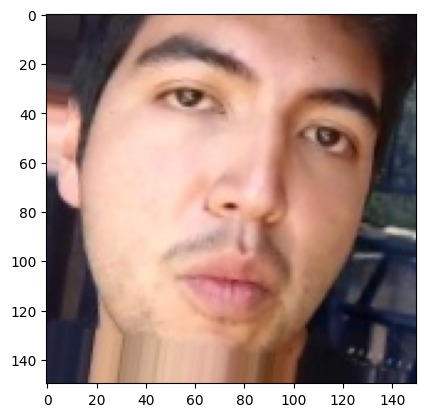

In [4]:
#plot the first image in the dataset
plt.imshow(images[6500])
print(images[6500].shape)

In [5]:
def Create_Y():
     return [0]*nJair + [1]*nCris + [2]*nOtro+[3]*nDylan1+[4]*nDesconocido
Y = Create_Y()

Y = np.array(Y)
X = np.array(images)

In [6]:
print(X.shape[1:])

(150, 150, 3)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

modelo = Sequential()

modelo.add(Conv2D(128, (3, 3)))
modelo.add(Activation('relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))


modelo.add(Conv2D(64, (3, 3)))
modelo.add(Activation('relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))



modelo.add(Flatten())

modelo.add(Dense(256))
modelo.add(Activation('relu'))
modelo.add(Dropout(0.5))

modelo.add(Dense(128))
modelo.add(Activation('relu'))
modelo.add(Dropout(0.5))

modelo.add(Dense(50))
modelo.add(Activation('relu'))
modelo.add(Dropout(0.5))

modelo.add(Dense(20))
modelo.add(Activation('relu'))
modelo.add(Dropout(0.5))

modelo.add(Dense(5))
modelo.add(Activation('softmax'))

modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [8]:
#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical
Y = to_categorical(Y, num_classes=5)

#Ya que tenemos 2 clases debemos esperar que shape[1] de y_train,y_val y y_test cambie de 0 a 1



In [9]:
Y[len(Y)-1]

array([0., 0., 0., 0., 1.], dtype=float32)

In [10]:
for i in range(len(Y)):
    print(Y[i], end=' ')


[1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0.] [1. 0. 0. 0. 0

[0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.] [0. 1. 0. 0. 0

[0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0.] [0. 0. 0. 1. 0

[0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1

[0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1.] [0. 0. 0. 0. 1

In [11]:
X = images.astype('float32') / 255.0

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 30)

In [13]:
checkpoint = ModelCheckpoint('CNN/modelPrueba111-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=False,mode='auto')

In [14]:
history=modelo.fit(X_train,Y_train,epochs=18,callbacks=[checkpoint],validation_split=0.3,batch_size=100,verbose=1) #,shuffle = True)

Epoch 1/18
67/67 [==============================] - ETA: 0s - loss: 1.3986 - accuracy: 0.3429INFO:tensorflow:Assets written to: CNN\modelPrueba111-001.model\assets


INFO:tensorflow:Assets written to: CNN\modelPrueba111-001.model\assets


67/67 [==============================] - 311s 4s/step - loss: 1.3986 - accuracy: 0.3429 - val_loss: 0.9842 - val_accuracy: 0.4501
Epoch 2/18
67/67 [==============================] - ETA: 0s - loss: 0.9870 - accuracy: 0.5116INFO:tensorflow:Assets written to: CNN\modelPrueba111-002.model\assets


INFO:tensorflow:Assets written to: CNN\modelPrueba111-002.model\assets


67/67 [==============================] - 227s 3s/step - loss: 0.9870 - accuracy: 0.5116 - val_loss: 0.8053 - val_accuracy: 0.6626
Epoch 3/18
67/67 [==============================] - ETA: 0s - loss: 0.8600 - accuracy: 0.6053INFO:tensorflow:Assets written to: CNN\modelPrueba111-003.model\assets


INFO:tensorflow:Assets written to: CNN\modelPrueba111-003.model\assets


67/67 [==============================] - 222s 3s/step - loss: 0.8600 - accuracy: 0.6053 - val_loss: 0.7075 - val_accuracy: 0.6783
Epoch 4/18
67/67 [==============================] - ETA: 0s - loss: 0.7445 - accuracy: 0.6758INFO:tensorflow:Assets written to: CNN\modelPrueba111-004.model\assets


INFO:tensorflow:Assets written to: CNN\modelPrueba111-004.model\assets


67/67 [==============================] - 222s 3s/step - loss: 0.7445 - accuracy: 0.6758 - val_loss: 0.6281 - val_accuracy: 0.6937
Epoch 5/18
67/67 [==============================] - ETA: 0s - loss: 0.6644 - accuracy: 0.7028INFO:tensorflow:Assets written to: CNN\modelPrueba111-005.model\assets


INFO:tensorflow:Assets written to: CNN\modelPrueba111-005.model\assets


67/67 [==============================] - 225s 3s/step - loss: 0.6644 - accuracy: 0.7028 - val_loss: 0.5423 - val_accuracy: 0.8418
Epoch 6/18
67/67 [==============================] - ETA: 0s - loss: 0.5907 - accuracy: 0.7375INFO:tensorflow:Assets written to: CNN\modelPrueba111-006.model\assets


INFO:tensorflow:Assets written to: CNN\modelPrueba111-006.model\assets


67/67 [==============================] - 223s 3s/step - loss: 0.5907 - accuracy: 0.7375 - val_loss: 0.4043 - val_accuracy: 0.8565
Epoch 7/18
67/67 [==============================] - ETA: 0s - loss: 0.5268 - accuracy: 0.7886INFO:tensorflow:Assets written to: CNN\modelPrueba111-007.model\assets


INFO:tensorflow:Assets written to: CNN\modelPrueba111-007.model\assets


67/67 [==============================] - 223s 3s/step - loss: 0.5268 - accuracy: 0.7886 - val_loss: 0.4028 - val_accuracy: 0.8484
Epoch 8/18
67/67 [==============================] - ETA: 0s - loss: 0.4386 - accuracy: 0.8200INFO:tensorflow:Assets written to: CNN\modelPrueba111-008.model\assets


INFO:tensorflow:Assets written to: CNN\modelPrueba111-008.model\assets


67/67 [==============================] - 474s 7s/step - loss: 0.4386 - accuracy: 0.8200 - val_loss: 0.2964 - val_accuracy: 0.8701
Epoch 9/18
67/67 [==============================] - ETA: 0s - loss: 0.3778 - accuracy: 0.8609INFO:tensorflow:Assets written to: CNN\modelPrueba111-009.model\assets


INFO:tensorflow:Assets written to: CNN\modelPrueba111-009.model\assets


67/67 [==============================] - 223s 3s/step - loss: 0.3778 - accuracy: 0.8609 - val_loss: 0.1858 - val_accuracy: 0.9622
Epoch 10/18
67/67 [==============================] - ETA: 0s - loss: 0.3103 - accuracy: 0.9127INFO:tensorflow:Assets written to: CNN\modelPrueba111-010.model\assets


INFO:tensorflow:Assets written to: CNN\modelPrueba111-010.model\assets


67/67 [==============================] - 221s 3s/step - loss: 0.3103 - accuracy: 0.9127 - val_loss: 0.1902 - val_accuracy: 0.9713
Epoch 11/18
67/67 [==============================] - ETA: 0s - loss: 0.2600 - accuracy: 0.9427INFO:tensorflow:Assets written to: CNN\modelPrueba111-011.model\assets


INFO:tensorflow:Assets written to: CNN\modelPrueba111-011.model\assets


67/67 [==============================] - 239s 4s/step - loss: 0.2600 - accuracy: 0.9427 - val_loss: 0.1287 - val_accuracy: 0.9944
Epoch 12/18
67/67 [==============================] - ETA: 0s - loss: 0.2639 - accuracy: 0.9445INFO:tensorflow:Assets written to: CNN\modelPrueba111-012.model\assets


INFO:tensorflow:Assets written to: CNN\modelPrueba111-012.model\assets


67/67 [==============================] - 261s 4s/step - loss: 0.2639 - accuracy: 0.9445 - val_loss: 0.1389 - val_accuracy: 0.9797
Epoch 13/18
67/67 [==============================] - ETA: 0s - loss: 0.2173 - accuracy: 0.9533INFO:tensorflow:Assets written to: CNN\modelPrueba111-013.model\assets


INFO:tensorflow:Assets written to: CNN\modelPrueba111-013.model\assets


67/67 [==============================] - 263s 4s/step - loss: 0.2173 - accuracy: 0.9533 - val_loss: 0.1430 - val_accuracy: 0.9902
Epoch 14/18
67/67 [==============================] - ETA: 0s - loss: 0.2021 - accuracy: 0.9658INFO:tensorflow:Assets written to: CNN\modelPrueba111-014.model\assets


INFO:tensorflow:Assets written to: CNN\modelPrueba111-014.model\assets


67/67 [==============================] - 267s 4s/step - loss: 0.2021 - accuracy: 0.9658 - val_loss: 0.1228 - val_accuracy: 0.9926
Epoch 15/18
67/67 [==============================] - ETA: 0s - loss: 0.2513 - accuracy: 0.9407INFO:tensorflow:Assets written to: CNN\modelPrueba111-015.model\assets


INFO:tensorflow:Assets written to: CNN\modelPrueba111-015.model\assets


67/67 [==============================] - 256s 4s/step - loss: 0.2513 - accuracy: 0.9407 - val_loss: 0.1373 - val_accuracy: 0.9716
Epoch 16/18
67/67 [==============================] - ETA: 0s - loss: 0.2014 - accuracy: 0.9526INFO:tensorflow:Assets written to: CNN\modelPrueba111-016.model\assets


INFO:tensorflow:Assets written to: CNN\modelPrueba111-016.model\assets


67/67 [==============================] - 254s 4s/step - loss: 0.2014 - accuracy: 0.9526 - val_loss: 0.0966 - val_accuracy: 0.9923
Epoch 17/18
67/67 [==============================] - ETA: 0s - loss: 0.1961 - accuracy: 0.9616INFO:tensorflow:Assets written to: CNN\modelPrueba111-017.model\assets


INFO:tensorflow:Assets written to: CNN\modelPrueba111-017.model\assets


67/67 [==============================] - 245s 4s/step - loss: 0.1961 - accuracy: 0.9616 - val_loss: 0.1182 - val_accuracy: 0.9832
Epoch 18/18
67/67 [==============================] - ETA: 0s - loss: 0.1650 - accuracy: 0.9616INFO:tensorflow:Assets written to: CNN\modelPrueba111-018.model\assets


INFO:tensorflow:Assets written to: CNN\modelPrueba111-018.model\assets


67/67 [==============================] - 235s 4s/step - loss: 0.1650 - accuracy: 0.9616 - val_loss: 0.0825 - val_accuracy: 0.9947


In [15]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


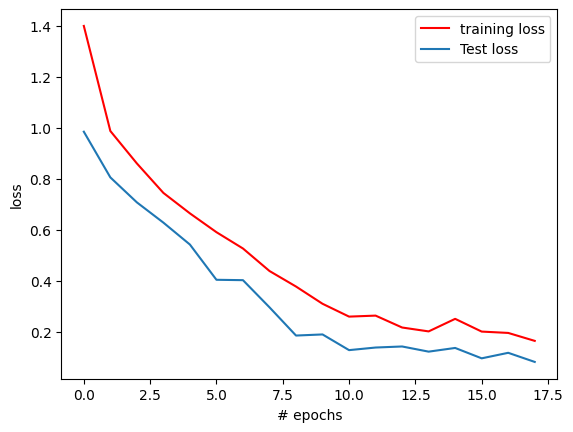

In [16]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='Test loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

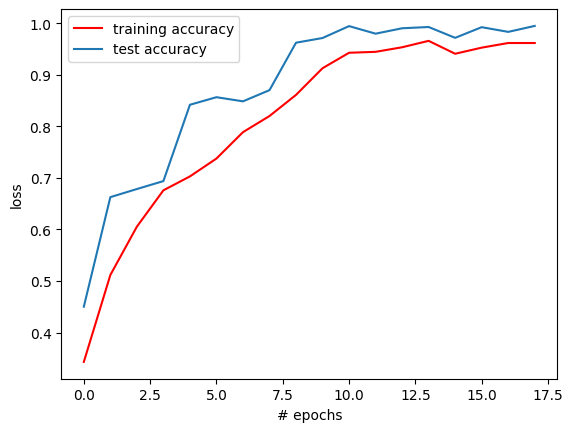

In [17]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='test accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
print(modelo.evaluate(X_test,Y_test))

128/128 [==============================] - 33s 224ms/step - loss: 0.0851 - accuracy: 0.9951
[0.08511713147163391, 0.9951004385948181]


In [19]:
print(modelo.evaluate(X_train,Y_train))

298/298 [==============================] - 73s 234ms/step - loss: 0.0736 - accuracy: 0.9978
[0.07362121343612671, 0.9977948069572449]


In [20]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

128/128 [==============================] - 37s 233ms/step
Confusion matrix, without normalization


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

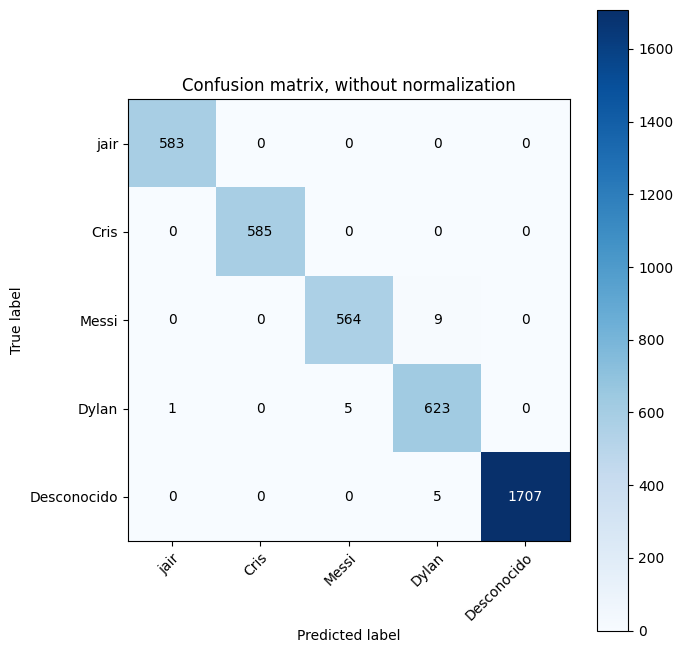

In [21]:
#Making prediction
#train_data,test_data,train_target,test_target

y_pred = np.argmax(modelo.predict(X_test), axis=1)
y_true = np.argmax(Y_test, axis=1)
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['jair','Cris','Messi','Dylan','Desconocido']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')

In [22]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

Accuracy Score =  0.9951004409603136


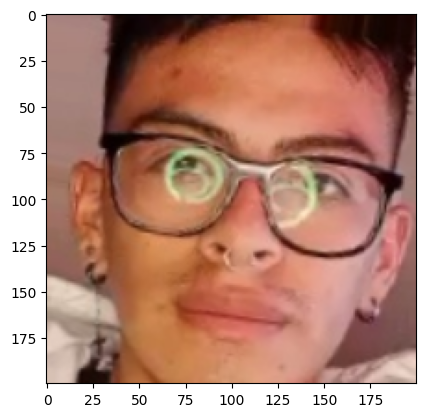

In [29]:
# Cargar la colección de imágenes
face_collection = imread_collection('Data/Jair/*.jpg')

# Redimensionar las imágenes para que tengan el mismo tamaño
desired_size = (200, 200)
face_resized = [cv2.resize(img, desired_size) for img in face_collection]

# Convertir la colección de imágenes redimensionadas en una matriz tridimensional
face_array = np.array(face_resized)

# Mostrar la primera imagen
plt.imshow(face_array[0])
plt.show()

In [28]:
from sklearn.metrics import classification_report
y_predict=modelo.predict(X_test)
y_predict= (y_predict>0.5)
print(classification_report(Y_test,y_predict))

128/128 [==============================] - 34s 239ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       1.00      1.00      1.00       585
           2       0.99      0.98      0.99       573
           3       0.98      0.99      0.98       629
           4       1.00      1.00      1.00      1712

   micro avg       1.00      0.99      0.99      4082
   macro avg       0.99      0.99      0.99      4082
weighted avg       1.00      0.99      0.99      4082
 samples avg       0.99      0.99      0.99      4082



C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.metrics import hamming_loss, jaccard_score

hamming_loss_value = hamming_loss(Y_test, y_predict)
jaccard_score_value = jaccard_score(Y_test, y_predict, average='samples')

print("Hamming Loss:", hamming_loss_value)
print("Jaccard Score:", jaccard_score_value)


Hamming Loss: 0.002106810387065164
Jaccard Score: 0.9933855952964233


In [31]:
from sklearn.metrics import multilabel_confusion_matrix

# Obtener las predicciones
y_pred = modelo.predict(X_test)
y_pred = (y_pred > 0.5)

# Calcular la matriz de confusión
cm = multilabel_confusion_matrix(Y_test, y_pred)

# Imprimir la matriz de confusión
for label in range(cm.shape[0]):
    print("Etiqueta:", label)
    print(cm[label])
    print()


128/128 [==============================] - 35s 240ms/step
Etiqueta: 0
[[3498    1]
 [   1  582]]

Etiqueta: 1
[[3497    0]
 [   0  585]]

Etiqueta: 2
[[3505    4]
 [  10  563]]

Etiqueta: 3
[[3442   11]
 [   9  620]]

Etiqueta: 4
[[2370    0]
 [   7 1705]]



In [32]:
# Obtener las predicciones en el conjunto de entrenamiento
y_pred_train = modelo.predict(X_train)
y_pred_train = (y_pred_train > 0.5).astype(int)

# Calcular métricas de evaluación en el conjunto de entrenamiento
report_train = classification_report(Y_train, y_pred_train)
print("Informe de clasificación en el conjunto de entrenamiento:")
print(report_train)


298/298 [==============================] - 73s 232ms/step
Informe de clasificación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1417
           1       1.00      1.00      1.00      1415
           2       1.00      1.00      1.00      1427
           3       0.99      0.99      0.99      1371
           4       1.00      1.00      1.00      3893

   micro avg       1.00      1.00      1.00      9523
   macro avg       1.00      1.00      1.00      9523
weighted avg       1.00      1.00      1.00      9523
 samples avg       1.00      1.00      1.00      9523



C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.metrics import multilabel_confusion_matrix

# Obtener las predicciones
y_pred = modelo.predict(X_train)
y_pred = (y_pred > 0.5)

# Calcular la matriz de confusión
cm = multilabel_confusion_matrix(Y_train, y_pred)

# Imprimir la matriz de confusión
for label in range(cm.shape[0]):
    print("Etiqueta:", label)
    print(cm[label])
    print()


298/298 [==============================] - 82s 263ms/step
Etiqueta: 0
[[8097    9]
 [   3 1414]]

Etiqueta: 1
[[8108    0]
 [   2 1413]]

Etiqueta: 2
[[8095    1]
 [   4 1423]]

Etiqueta: 3
[[8144    8]
 [  11 1360]]

Etiqueta: 4
[[5629    1]
 [   6 3887]]

